**Objective:**
The objective of this assignment is to demonstrate the application of L1 (Lasso) and L2 (Ridge) regularization techniques in linear regression. You will implement these regularizations and apply optimization algorithms (such as Gradient Descent) to train models on a dataset.

**Problem Description:**
You are tasked with building a linear regression model with both L1 (Lasso) and L2 (Ridge) regularization to minimize overfitting. You will:

**Load a dataset.**
Split it into training and testing sets.
Implement L1 and L2 regularization.
Implement gradient descent optimization to minimize the loss.
Evaluate the models' performance on the test set.

**Dataset:**
You will use the California housing dataset. This dataset contains information about various attributes of homes in California and is often used for regression tasks.

**Features:** longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, etc.

**Target:** The target is the median house value.
You can load the dataset from the sklearn.datasets library.

**Steps:**



In [ ]:
#1.Import Libraries and Load Dataset:Import necessary libraries and load the California housing dataset.
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


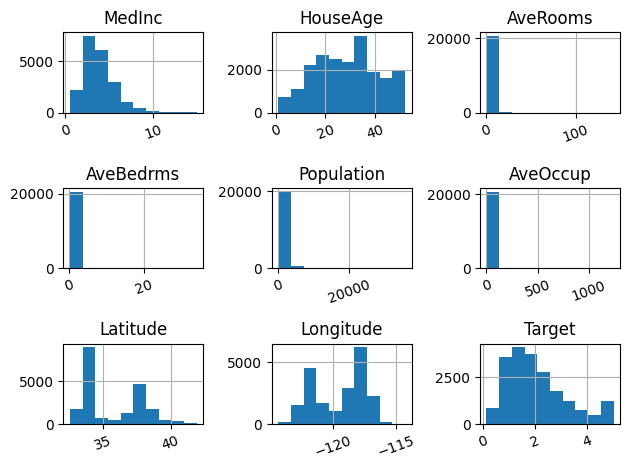

In [ ]:
df.hist(xrot=20)
plt.tight_layout()
plt.show()

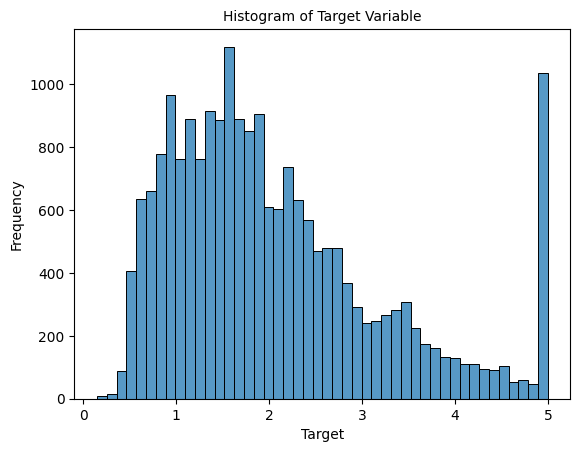

In [ ]:
sns.histplot(df['Target'])
plt.xlabel('Target',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Histogram of Target Variable',fontsize=10)
plt.show()

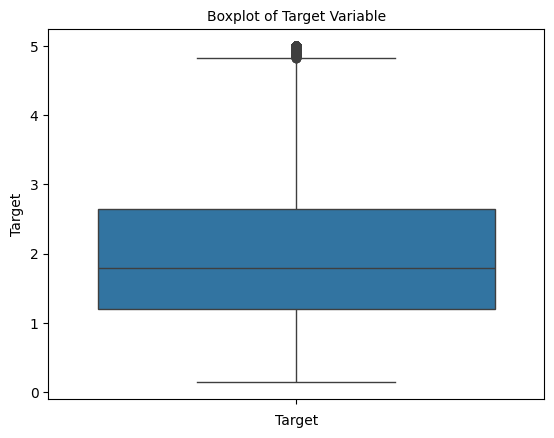

In [ ]:
sns.boxplot(df['Target'])
plt.xlabel('Target',fontsize=10)
plt.title('Boxplot of Target Variable',fontsize=10)
plt.show()

In [ ]:
df = df[df['Target']<4.9]

Text(0.5, 1.0, 'Correlation Heatmap')

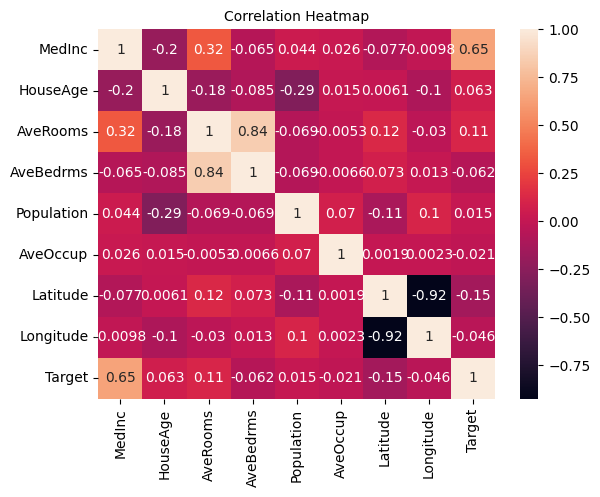

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap',fontsize=10)

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=df.drop('Target',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(df.drop('Target',axis=1).values,i) for i in range(len(df.drop('Target',axis=1).columns))]
print(vif_data)

     features         VIF
0      MedInc   14.508693
1    HouseAge    7.334575
2    AveRooms   49.245122
3   AveBedrms   45.318261
4  Population    2.944734
5    AveOccup    1.093477
6    Latitude  562.540797
7   Longitude  649.951931


In [ ]:
df = df.drop('Longitude',axis=1)

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=df.drop('Target',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(df.drop('Target',axis=1).values,i) for i in range(len(df.drop('Target',axis=1).columns))]
print(vif_data)

     features        VIF
0      MedInc  12.010826
1    HouseAge   6.925321
2    AveRooms  44.219807
3   AveBedrms  40.434736
4  Population   2.806527
5    AveOccup   1.092866
6    Latitude  25.511679


In [ ]:
df = df.drop('AveBedrms',axis=1)

In [ ]:
vif_data=pd.DataFrame()
vif_data['features']=df.drop('Target',axis=1).columns
vif_data['VIF']=[variance_inflation_factor(df.drop('Target',axis=1).values,i) for i in range(len(df.drop('Target',axis=1).columns))]
print(vif_data)

     features        VIF
0      MedInc   7.156020
1    HouseAge   6.831993
2    AveRooms   7.618746
3  Population   2.779045
4    AveOccup   1.092621
5    Latitude  21.841079


In [ ]:
#2.Preprocessing:
x=df.drop('Target',axis=1)
y=df.Target
scaler = StandardScaler()
x= scaler.fit_transform(x)
x=sm.add_constant(x)
#Split the data into training and testing sets.
#Standardize the features to ensure that gradient descent works efficiently.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#3.Implement Regularization Techniques: Implement both L1 and L2 regularization in the cost function:
def compute_cost(x, y, w, reg_type=None, lambda_=0.1):
  m = len(y)  # Number of samples
  y_pred = np.dot(x, w)  # Predicted values
  cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # Standard linear regression cost

  # Add L1 (Lasso) Regularization
  if reg_type == "l1":
      cost += (lambda_) * np.sum(np.abs(w))

  # Add L2 (Ridge) Regularization
  elif reg_type == "l2":
      cost += (lambda_ / 2) * np.dot(w,w.T)

  return cost
#L1 Regularization (Lasso): Adds the absolute value of the coefficients to the cost function, leading to sparsity (some coefficients become zero).
#L2 Regularization (Ridge): Adds the square of the coefficients to the cost function, discouraging large weights but not forcing them to zero.

In [ ]:
def compute_gradient(x,y,w,reg_type=None,lambda_=0.1):
  m=len(y)
  y_pred=np.dot(x,w)
  gradient=(1/m)*np.dot(x.T,(y_pred-y))
  # Apply L1 (Lasso) Regularization
  if reg_type == "l1":
    gradient +=lambda_*np.sign(w)  # Add L1 term

  # Apply L2 (Ridge) Regularization
  elif reg_type == "l2":
    gradient +=lambda_*w  # Add L2 term

  return gradient

In [ ]:
#4.Gradient Descent Optimization: Implement the gradient descent algorithm to minimize the cost function. You should compute the gradients for both regularization terms:
def gradient_descent(x, y,alpha=0.01, epochs=1000, reg_type=None, lambda_=0.1):
  m, n = x.shape  # Number of samples and features
  w=np.zeros(n)
  cost_history=[]
  for _ in range(epochs):
    gradient=compute_gradient(x,y,w,reg_type,lambda_)
    w-=alpha*gradient
    cost=compute_cost(x,y,w,reg_type,lambda_)
    cost_history.append(cost)
  return w,cost_history

L1 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+𝜆⋅sign(𝜃)

L2 Regularization Gradient:
∂/∂𝜃=𝑋T(𝑦−𝑦^)+2𝜆⋅𝜃


In [ ]:
w=np.zeros(x.shape[1])

In [ ]:
#5.Training and Evaluation:
w_l1,cost_history_l1=gradient_descent(x_train,y_train,alpha=0.01,epochs=1000,reg_type="l1",lambda_=0.1)
w_l2,cost_history_l2=gradient_descent(x_train,y_train,alpha=0.01,epochs=1000,reg_type="l2",lambda_=0.1)
#Train the model using gradient descent for both regularizations.
#Evaluate the models on the test set using RMSE (Root Mean Squared Error) or another suitable metric.

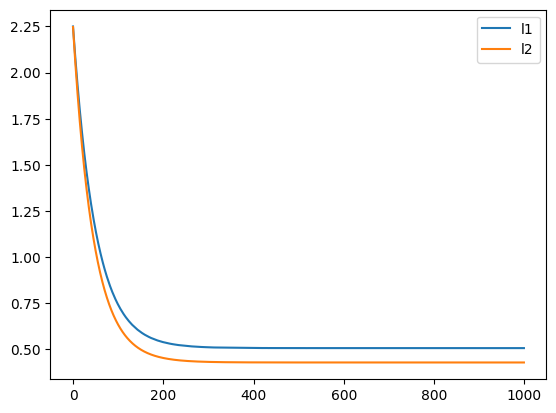

In [ ]:
plt.plot(cost_history_l1,label='l1')
plt.plot(cost_history_l2,label='l2')
plt.legend()

In [ ]:
y_pred_l1=np.dot(x_test,w_l1)
y_pred_l2=np.dot(x_test,w_l2)

In [ ]:
rmse_l1 = np.sqrt(mean_squared_error(y_test, y_pred_l1))
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
r2_l1 = r2_score(y_test, y_pred_l1)

print(f"RMSE: {rmse_l1:.4f}")
print(f"MAE: {mae_l1:.4f}")
print(f"R_squared Score: {r2_l1:.4f}")

RMSE: 0.7604
MAE: 0.5677
R_squared Score: 0.4004


In [ ]:
rmse_l2 = np.sqrt(mean_squared_error(y_test, y_pred_l2))
mae_l2 = mean_absolute_error(y_test, y_pred_l2)
r2_l2 = r2_score(y_test, y_pred_l2)

print(f"RMSE: {rmse_l2:.4f}")
print(f"MAE: {mae_l2:.4f}")
print(f"R_squared Score: {r2_l2:.4f}")

RMSE: 0.7525
MAE: 0.5467
R_squared Score: 0.4129


**Deliverables:**
1.Code for implementing L1 and L2 regularization with gradient descent.

2.Evaluation results (RMSE for both L1 and L2 models).

3.Visual representation of the cost history.

4.Discussion on the effect of regularization on model performance and overfitting.


NOTE
> Comments in Python code must be present explaining the necessary variables, functions, and

> In your Report, content should present or each Task with your observations and a final conclusion

> The Report should be made in latex and Tex files should be submitted too

